# **1.   Frame the problem**

Bangalore, known as the Silicon Valley of India, faces severe traffic congestion due to rapid urbanization and population growth. Commuters and businesses suffer from increased travel times, unpredictable delays, and reduced productivity. Additionally, city planners struggle to manage road congestion effectively, especially during peak hours, adverse weather conditions, and unplanned incidents.


*   BBC Article in December 2016: https://www.bbc.com/news/world-asia-india-38155635
*   India Today Article in August 2023: https://www.indiatoday.in/india/story/bengaluru-traffic-woes-impacts-economy-hit-rs-200000-study-2417410-2023-08-07


To address these challenges, this project aims to develop a traffic prediction model that can forecast congestion levels based on historical and contextual data (such as weather, public transport usage and incident reports). By providing real-time traffic insights and predictive analytics, this model could empower commuters to make informed travel decisions, aid traffic authorities in resource allocation, and contribute to easing congestion in Bangalore.

## Types of Questions in Data Analysis:

> "Doing data analysis requires quite a bit of thinking and we believe that when you’ve completed a good data analysis, you’ve spent more time thinking than doing." - Roger Peng

1. **Descriptive** - "seeks to summarize a characteristic of a set of data"
2. **Exploratory** - "analyze the data to see if there are patterns, trends, or relationships between variables" (hypothesis generating)
3. **Inferential** - "a restatement of this proposed hypothesis as a question and would be answered by analyzing a different set of data" (hypothesis testing)
4. **Predictive** - "determine the impact on one factor based on other factor in a population - to make a prediction"
5. **Causal** - "asks whether changing one factor will change another factor in a population - to establish a causal link"
6. **Mechanistic** - "establish *how* the change in one factor results in change in another factor in a population - to determine the exact mechanism"


### Descriptive
1. What is the average traffic volume in each area or at each road/intersection?
2. What is the most common congestion level across different areas?
3. How often are incident reports filed in each area?
4. What are the typical weather conditions during high traffic times?
5. How does public transport usage vary by area?

### Exploratory & Inferential
1. Is there a correlation between traffic volume and average speed?
2. Do certain areas show consistently higher road capacity utilization?
3. Does traffic volume increase in specific weather conditions?
4. Is there a relationship between congestion level and public transport usage?
5. How does environmental impact vary with traffic volume and congestion level?

### Predictive
1. Can we predict tomorrow’s traffic volume based on historical data?
2. What will the congestion level be at specific times of day in different areas?
3. Can we forecast the impact of weather conditions on travel time?
4. How likely are incidents to occur based on traffic volume and road conditions?
5. What will the pedestrian and cyclist count be in different areas at peak times?

### Causal
1. Does an increase in traffic volume lead to higher congestion levels?
2. Does roadwork and construction activity significantly impact average speed?
3. Is there a causal relationship between public transport usage and traffic volume reduction?
4. Does higher traffic volume contribute to increased environmental impact?
5. Does an increase in traffic signal compliance lead to improved average speed?

### Mechanistic
1. How does traffic volume directly influence road capacity utilization across different intersections?
2. What mechanism explains the relationship between congestion level and environmental impact?
3. How does roadwork and construction activity affect travel time index at a detailed level?
4. How does pedestrian and cyclist count impact traffic flow in various areas?
5. What is the precise mechanism through which weather conditions alter traffic patterns?


# **2.   Acquire the data**
For the Bangalore traffic prediction model, we sourced relevant datasets from Kaggle, a popular platform for data science and machine learning enthusiasts, where diverse and well-organized datasets are available for open use. Kaggle’s datasets provide a foundation for traffic analysis with high-quality data, including traffic volume, congestion levels, environmental factors, and public transportation usage, often collected from major cities worldwide. Although some datasets may not be specific to Bangalore, Kaggle’s wide selection offers valuable proxies and templates. For instance, data from other cities with similar urban and traffic dynamics can serve as a reliable reference, allowing us to fine-tune general traffic models and adapt them to Bangalore-specific conditions.

**Bangalore-Traffic-Dataset :** https://www.kaggle.com/datasets/preethamgouda/banglore-city-traffic-dataset

# **3.   Refine the data**

Since data could be messy, so we need to refine it. This can be done using the following operations:   

- **Remove** e.g. remove redundant data from the data frame
- **Derive** e.g. week day from the date
- **Parse** e.g. extract year from the date
- **Missing** e.g. Check for missing or incomplete data
- **Quality** e.g. Check for duplicates, accuracy, unusual data
- **Convert** e.g. free text to coded value
- **Calculate** e.g. percentages, proportion
- **Merge** e.g. first and surname for full name
- **Aggregate** e.g. rollup by year, cluster by area
- **Filter** e.g. exclude based on location
- **Sample** e.g. extract a representative data
- **Summary** e.g. show summary stats like mean

We will be performing the following operations on our dataset :

*   Checking missing values
*   Removing the duplicates
*   Deriving a new feature
*   Converting the categorical data



For ease of access we have downloaded and uploaded the dataset in the drive. So we can directly access the dataset by mounting drive in colab.

In [2]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path='/content/drive/MyDrive/Data Science and Deep Learning/Banglore_traffic_Dataset.csv'
traffic_data = pd.read_csv(file_path)

# Display the first few rows to understand the structure and content of the dataset
traffic_data.head()

,Date,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity
0,2022-01-01,Indiranagar,100 Feet Road,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,84.044600,85.403629,111,Clear,No
1,2022-01-01,Indiranagar,CMH Road,30825,29.377125,1.500000,100.000000,100.000000,1,111.650,41.924899,91.407038,59.983689,100,Clear,No
2,2022-01-01,Whitefield,Marathahalli Bridge,7399,54.474398,1.039069,28.347994,36.396525,0,64.798,44.662384,61.375541,95.466020,189,Clear,No
3,2022-01-01,Koramangala,Sony World Junction,60874,43.817610,1.500000,100.000000,100.000000,1,171.748,32.773123,75.547092,63.567452,111,Clear,No
4,2022-01-01,Koramangala,Sarjapur Road,57292,41.116763,1.500000,100.000000,100.000000,3,164.584,35.092601,64.634762,93.155171,104,Clear,No


**Checking missing values**

Initial data exploration to check for null values and data types

In [4]:
# Check for data types
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8936 entries, 0 to 8935
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Date                                8936 non-null   object 
 1   Area Name                           8936 non-null   object 
 2   Road/Intersection Name              8936 non-null   object 
 3   Traffic Volume                      8936 non-null   int64  
 4   Average Speed                       8936 non-null   float64
 5   Travel Time Index                   8936 non-null   float64
 6   Congestion Level                    8936 non-null   float64
 7   Road Capacity Utilization           8936 non-null   float64
 8   Incident Reports                    8936 non-null   int64  
 9   Environmental Impact                8936 non-null   float64
 10  Public Transport Usage              8936 non-null   float64
 11  Traffic Signal Compliance           8936 no

In [5]:
# Check for any missing values
missing_values = traffic_data.isnull().sum()

missing_values

,0
Date,0
Area Name,0
Road/Intersection Name,0
Traffic Volume,0
Average Speed,0
Travel Time Index,0
Congestion Level,0
Road Capacity Utilization,0
Incident Reports,0
Environmental Impact,0


**Removing the duplicates**

drop_duplicates() method removes any rows in dataframe that are exact duplicates of other rows. It keeps only the first occurrence by default.

However, we have observed that there were no duplicates as the number of row before and after removing duplicates remains the same.

In [6]:
print(f"Number of rows in traffic_data before removing duplicates: {len(traffic_data)}")

# Remove duplicate rows from the DataFrame
traffic_data = traffic_data.drop_duplicates()

print(f"Number of rows in traffic_data after removing duplicates: {len(traffic_data)}")

Number of rows in traffic_data before removing duplicates: 8936
Number of rows in traffic_data after removing duplicates: 8936


**Deriving a new feature**

As we want to predict traffic volume on a particular weekday, so we are creating a new feature called "*Weekday*".

Using `.dt.day_name()` we are retrieving the name of the day (e.g., "Monday", "Tuesday") for each date, adding it as a new column called Weekday.

In [7]:
# Convert the Date column to datetime format
traffic_data['Date'] = pd.to_datetime(traffic_data['Date'])

traffic_data['Weekday'] = traffic_data['Date'].dt.day_name()

#Create a copy of traffic
traffic_data_copy = traffic_data.copy()

traffic_data.head()

,Date,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity,Weekday
0,2022-01-01,Indiranagar,100 Feet Road,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,84.044600,85.403629,111,Clear,No,Saturday
1,2022-01-01,Indiranagar,CMH Road,30825,29.377125,1.500000,100.000000,100.000000,1,111.650,41.924899,91.407038,59.983689,100,Clear,No,Saturday
2,2022-01-01,Whitefield,Marathahalli Bridge,7399,54.474398,1.039069,28.347994,36.396525,0,64.798,44.662384,61.375541,95.466020,189,Clear,No,Saturday
3,2022-01-01,Koramangala,Sony World Junction,60874,43.817610,1.500000,100.000000,100.000000,1,171.748,32.773123,75.547092,63.567452,111,Clear,No,Saturday
4,2022-01-01,Koramangala,Sarjapur Road,57292,41.116763,1.500000,100.000000,100.000000,3,164.584,35.092601,64.634762,93.155171,104,Clear,No,Saturday


**Converting the categorical data**

Observing at the dataset we have identified that the following columns contains categorical data : *`*`'Weekday', 'Area Name', 'Road/Intersection Name', 'Weather Conditions'`*`* and `'Roadwork and Construction Activity'`

Finally used lable encoding to convert each category in the above mentioned columns to unique numerical codes, simplifying the dataset for computational processes while retaining the original categorical information.

In [8]:
from sklearn.preprocessing import LabelEncoder

# Dictionary to store the LabelEncoders for each categorical column
label_encoders = {}

# List of categorical columns to encode
categorical_columns = ['Weekday', 'Area Name', 'Road/Intersection Name', 'Weather Conditions', 'Roadwork and Construction Activity']

# Apply Label Encoding to each categorical column
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    traffic_data[column] = label_encoders[column].fit_transform(traffic_data[column])

# Display the first 10 rows to verify the encoding
traffic_data.head(10)

,Date,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity,Weekday
0,2022-01-01,2,0,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,84.044600,85.403629,111,0,0,2
1,2022-01-01,2,3,30825,29.377125,1.500000,100.000000,100.000000,1,111.650,41.924899,91.407038,59.983689,100,0,0,2
2,2022-01-01,6,8,7399,54.474398,1.039069,28.347994,36.396525,0,64.798,44.662384,61.375541,95.466020,189,0,0,2
3,2022-01-01,4,11,60874,43.817610,1.500000,100.000000,100.000000,1,171.748,32.773123,75.547092,63.567452,111,0,0,2
4,2022-01-01,4,9,57292,41.116763,1.500000,100.000000,100.000000,3,164.584,35.092601,64.634762,93.155171,104,0,0,2
5,2022-01-01,5,13,47848,34.241963,1.500000,100.000000,100.000000,3,145.696,39.927871,61.016765,55.394571,94,2,0,2
6,2022-01-01,5,1,36574,29.982430,1.500000,100.000000,100.000000,3,123.148,72.479130,81.573690,90.372008,115,0,0,2
7,2022-01-01,3,7,25379,38.455179,1.500000,79.038823,100.000000,2,100.758,46.315344,88.120758,68.181480,92,0,0,2
8,2022-01-01,3,12,25022,35.039373,1.500000,78.979596,100.000000,1,100.044,44.261693,99.426018,62.102764,105,0,0,2
9,2022-01-01,1,4,31760,56.904556,1.500000,97.672462,100.000000,1,113.520,12.854260,83.635718,83.878218,91,0,0,2


# **4.   Explore the data**

We would like to visually explore the dataset to see if we can confirm some of the hypothesis and formulate new hypothesis based on the insights from different features.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

**1. Are weekends less congested compared to weekdays?**

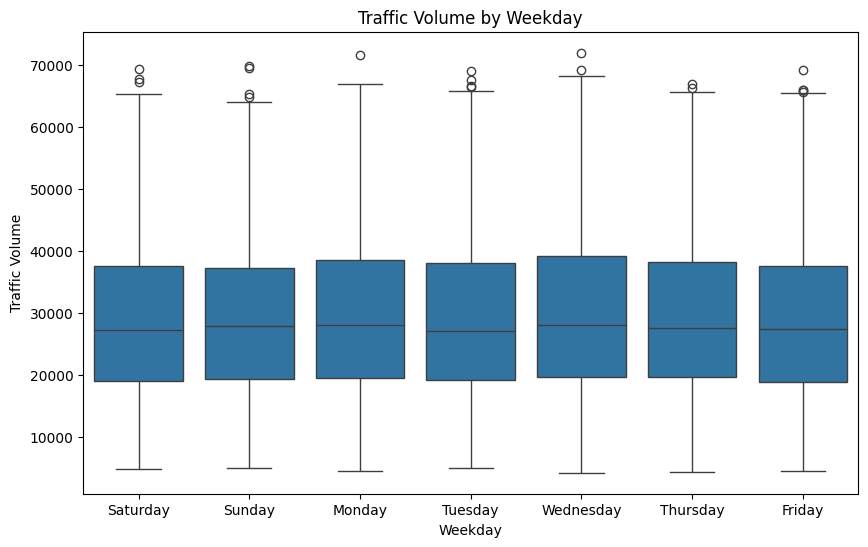

In [10]:
# create a plot for weekday and Traffic Volume from traffic_data_copy

plt.figure(figsize=(10, 6))
sns.boxplot(x='Weekday', y='Traffic Volume', data=traffic_data_copy)
plt.title('Traffic Volume by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Traffic Volume')
plt.show()

Based on the box plot generated by the code, we can deduce the following about the traffic volume across different days of the week:


*   **Variability:** The box plots show the distribution of traffic volume for each day of the week. Some days have a wider range of traffic volume than others like on `Monday` and `Wednesday` as indicated by the length of the box and the whiskers.


*   **Median/Average Traffic:**  The median traffic volume (represented by the horizontal line within the box) appears to vary across different weekdays. This suggests that certain days of the week like `Monday` and `Wednesday` tend to have higher and other days have lower average traffic volumes.


*   **Outliers:**  The box plot also shows outliers (individual data points outside the whiskers) for all weekdays. These represent traffic volumes that are unusually high or low compared to the rest of the data on that day.


*   **Potential Trends:** Based on the visualization, we have observed some general patterns, such as:
    *   Higher traffic volumes on `Monday` and `Wednesday`.


* **Observation:**  Traffic volume appears to be higher on Mondays and Wednesdays, with potentially lower volumes on weekends.
* **Deduction:**  This suggests that weekdays, particularly the beginning and middle of the week, are characterized by higher traffic activity in Bangalore. This could be attributed to the typical work/school week schedule.


**2. Which areas experience the highest traffic density?**

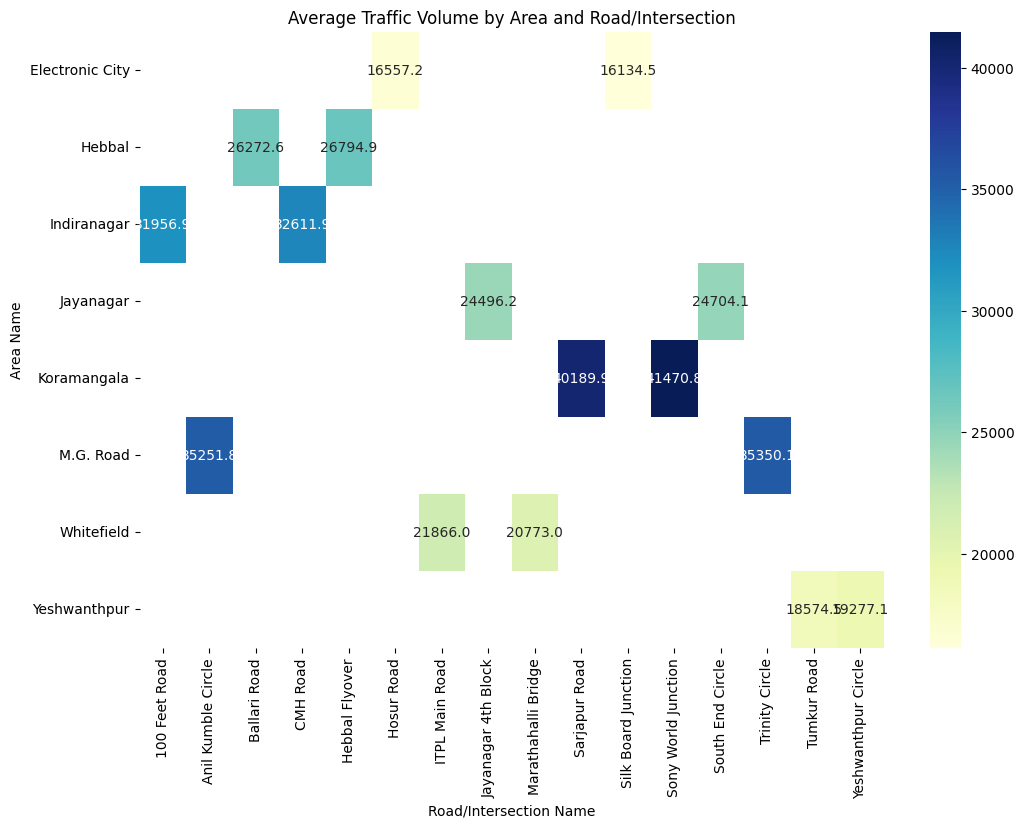

In [11]:
# create a heat map for 'Area Name', 'Road/Intersection Name' against 'Traffic Volume'

plt.figure(figsize=(12, 8))
heatmap_data = traffic_data_copy.groupby(['Area Name', 'Road/Intersection Name'])['Traffic Volume'].mean().unstack()
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Average Traffic Volume by Area and Road/Intersection')
plt.xlabel('Road/Intersection Name')
plt.ylabel('Area Name')
plt.show()

Based on the heatmap generated by the code, we can deduce the following observations about the average traffic volume in different areas and at different road/intersections in Bangalore:


*   **High Traffic Areas/Intersections:**  `Kormangala, Sarjapur Road` and `Kormangala, Sony World Junction` have the highest congestion level due to highest traffic volume.
*   **Low Traffic Areas/Intersections:** Conversely, `Electronic City`, `Hosur Road` and `Electronic City`, `Silk Board Junction` have the lowest congestion leve.

* **Observation:**  The heatmap highlights areas like `Koramangala`, `Sarjapur Road` as having the highest average traffic volume, indicating significant congestion in these areas.
* **Deduction:** These locations may represent key commercial, residential, or transportation hubs in Bangalore, leading to a higher volume of traffic flow.



**3. How does traffic density vary under different weather conditions?**

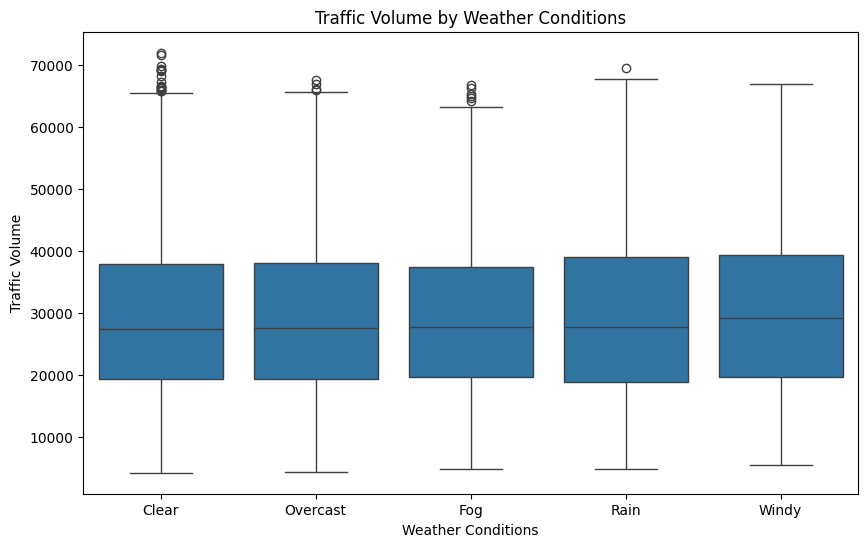

In [12]:
# create a plot between 'Weather Conditions' and 'Traffic Volume'

plt.figure(figsize=(10, 6))
sns.boxplot(x='Weather Conditions', y='Traffic Volume', data=traffic_data_copy)
plt.title('Traffic Volume by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Traffic Volume')
plt.show()

Based on the box plot showing "Traffic Volume by Weather Conditions," we can deduce the following:


*   **Variability:** The box plots illustrate the distribution of traffic volume under different weather conditions. `Rainy` weather conditions seem to exhibit a greater range of traffic volume than others, as indicated by the box's length and the whiskers.

*   **Median/Average Traffic:** The median traffic volume (represented by the horizontal line within the box) appears to be equal across all weather conditions.  

*   **Outliers:** The plot also reveals outliers (individual data points outside the whiskers) for several weather conditions. For `Clear` weather there are significantly high number of outliers representing high traffic volume.

*   **Potential Trends:** Based on the visualization, we can potentially identify general patterns, such as:
    *   Higher traffic volumes `Rainy` and `Clear` weather.
    *   Lower traffic volumes during `Fogy` weather.

* **Observation:**  Rainy and clear weather seem to exhibit a wider range of traffic volume, with outliers indicating potentially very high traffic in clear weather.
* **Deduction:**
    *  Rain might lead to both increased and decreased traffic depending on the intensity and duration.
    *  Clear weather could signal a higher volume of vehicles on the road due to favorable driving conditions, potentially leading to increased congestion.
    *  Foggy weather appears to have a lower average traffic volume. This could be due to reduced visibility and slower speeds.


**4. How does traffic volume affect the congestion level?**

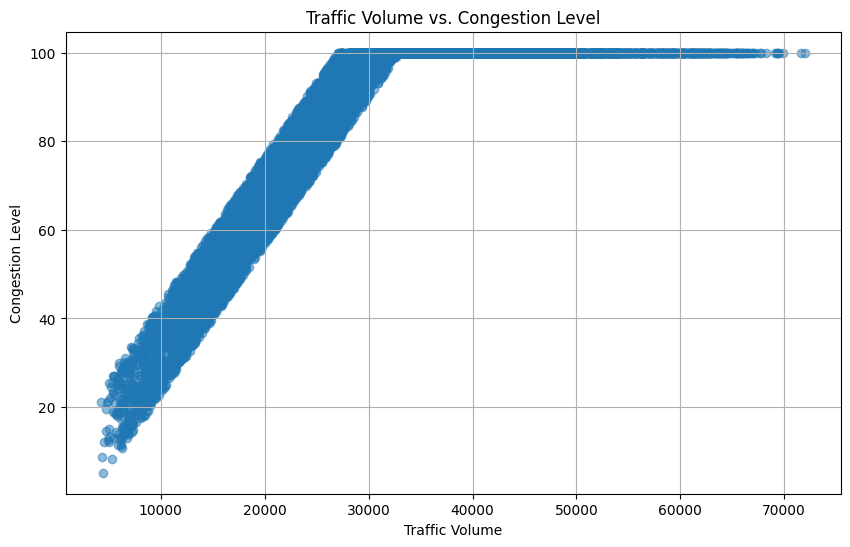

In [13]:
# create a plot between 'Congestion Level' and 'Traffic Volume'
plt.figure(figsize=(10, 6))
plt.scatter(traffic_data_copy['Traffic Volume'], traffic_data_copy['Congestion Level'], alpha=0.5)
plt.xlabel('Traffic Volume')
plt.ylabel('Congestion Level')
plt.title('Traffic Volume vs. Congestion Level')
plt.grid(True)
plt.show()

Based on the plot showing "`Traffic Volume` by `Congestion Level`" we can deduce the following:

* **Observation:** The scatter plot displays a positive correlation between Traffic Volume and Congestion Level.
* **Deduction:** This observation is consistent with expectations as higher traffic volumes generally lead to higher congestion levels.

**Overall Deductions:**

* Bangalore faces significant traffic congestion issues, particularly in areas like `Koramangala`, `Sarjapur Road`.
* Weekday traffic is generally higher, especially early in the week.
* Weather conditions, particularly `rain` and `clear` weather, have a noticeable influence on traffic volume and congestion.
* There's a strong correlation between `traffic volume` and `congestion level`, highlighting the need to manage traffic flow effectively to mitigate congestion.

# **4.   Model the Solution**

Before feeding the data to any model for training, we will do the following pre-processing :

1. **Feature and Target Selection:**

    * X contains the features for the model, with Date (a non-numeric feature) and Traffic Volume (target variable) removed from the dataset.
    * y is set to Traffic Volume, which is the target variable for prediction.

2. **Feature Scaling:**

    * The StandardScaler is used to standardize the features in X to a mean of 0 and a standard deviation of 1. This scaling ensures that each feature contributes equally to the model and is particularly useful when features have different units or scales.

3. **Train-Test Split:**

    * The dataset is split into training (80%) and test (20%) sets using train_test_split, which allows the model to train on one set and validate on another.
    * random_state=42 is used for reproducibility, ensuring the same split each time.



In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting the data into features (X) and target (y)
X = traffic_data.drop(['Date', 'Traffic Volume'], axis=1)  # Dropping Date as it won't be directly used in modeling
y = traffic_data['Traffic Volume']

# Scaling features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Checking the shapes of the resulting sets to confirm the split
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((7148, 15), (1788, 15), (7148,), (1788,))

### **Support Vector Regression (SVR)**

It is a powerful machine learning algorithm commonly chosen for regression tasks where the goal is to predict a continuous outcome variable. Here are some reasons why SVR is a good choice, particularly for traffic volume prediction:



1. **Effective for High Dimensionality and Nonlinearity**
    * can andle a large number of features because it works by finding an optimal hyperplane in high-dimensional space.
    * can capture complex, nonlinear relationships between features and the target variable, which is particularly useful in traffic data where patterns are influenced by a range of nonlinear factors (e.g., weather, road conditions)


2. **Robustness to Outliers**
    * finds a margin around the hyperplane that includes as many points as possible


3. **Flexibility with Kernels**
    * supports various kernel functions (linear, polynomial, RBF, etc.), providing flexibility to model different types of data patterns.


In [15]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Initializing and training the Support Vector Regression model
svr_model = SVR(kernel='rbf')  # RBF kernel is commonly used for regression tasks
svr_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_svr = svr_model.predict(X_test)

# Evaluating the SVR model using common regression metrics
svr_mae = mean_absolute_error(y_test, y_pred_svr)
svr_mse = mean_squared_error(y_test, y_pred_svr)
svr_r2 = r2_score(y_test, y_pred_svr)

print(f"SVR - Mean Absolute Error: {svr_mae}")
print(f"SVR - Mean Squared Error: {svr_mse}")
print(f"SVR - R-squared: {svr_r2}")

SVR - Mean Absolute Error: 10129.049232529464
SVR - Mean Squared Error: 163810990.27632454
SVR - R-squared: 0.023769946276416487


Three regression metrics are used to evaluate the model's performance:
  * **Mean Absolute Error (MAE)**: Measures the average absolute differences between predicted and actual values.
  * **Mean Squared Error (MSE)**: Captures the average of squared differences, penalizing larger errors more significantly.
  * **R-squared (R²)**: Indicates how well the model explains the variability in the target variable (closer to 1 indicates a better fit).

### **Historical Average (HA) model**

It is a baseline model used in predictive modeling, particularly in traffic and time series forecasting, for several reasons:

1. **Simplicity and Efficiency**
  *  computationally inexpensive to train and use, as they require only basic statistical calculations (averaging)
2. **Interpretability**
  * predictions are based on average historical values, which can be easily explained and understood by non-technical stakeholders
3. **Robustness in Stable Patterns**
  * certain patterns are stable over time (e.g., monday rush hours), the HA model can perform reasonably well, as it captures the average conditions based on historical data for each location.
4. **Useful in Ensemble Models**
  * can serve as a component in ensemble models, where multiple predictions are averaged to enhance accuracy.

In [16]:
# Converting X_train back into a DataFrame with column names for compatibility in merging with y_train
X_train_df = pd.DataFrame(X_train, columns=X.columns).reset_index(drop=True)
y_train_df = y_train.reset_index(drop=True)

# Reattaching the target variable (Traffic Volume) to create a complete dataset
historical_averages_df = X_train_df.copy()
historical_averages_df['Traffic Volume'] = y_train_df

# Grouping by Area Name and Road/Intersection Name to calculate historical averages
# As we are working with encoded data, we will group by these encoded values
ha_model_df = historical_averages_df.groupby(['Area Name', 'Road/Intersection Name'])['Traffic Volume'].mean()

# Adjusting prediction function for HA model
def predict_ha(X_test_df, ha_model_df):
    y_pred_ha = []
    for _, row in X_test_df.iterrows():
        # Using tuple indexing to locate specific historical averages or a default if not found
        avg_value = ha_model_df.get((row['Area Name'], row['Road/Intersection Name']), y_train.mean())
        y_pred_ha.append(avg_value)
    return y_pred_ha

# Predicting traffic volume on the test set using HA model
y_pred_ha = predict_ha(pd.DataFrame(X_test, columns=X.columns), ha_model_df)

# Evaluating the HA model
ha_mae = mean_absolute_error(y_test, y_pred_ha)
ha_mse = mean_squared_error(y_test, y_pred_ha)
ha_r2 = r2_score(y_test, y_pred_ha)

print(f"HA Model - Mean Absolute Error: {ha_mae}")
print(f"HA Model - Mean Squared Error: {ha_mse}")
print(f"HA Model - R-squared: {ha_r2}")

HA Model - Mean Absolute Error: 8452.706397744036
HA Model - Mean Squared Error: 110128729.43507594
HA Model - R-squared: 0.3436888741618661


### **LSTM (Long Short-Term Memory)**
It is a type of recurrent neural network (RNN) designed to handle sequence data and capture patterns over time. They are particularly well-suited for tasks where the order of data matters, which makes them highly effective for time series prediction, natural language processing, and other applications where temporal or sequential patterns are present. Here are some reasons why the LSTM model is often chosen:

1. **Ability to Capture Long-Term Dependencies**
  * use memory cells with a unique architecture that includes gates (input, output, and forget gates) to control the flow of information which
  enables LSTMs to learn from dependencies across long time horizons, which is critical for applications where historical data influences the outcome.

2. **Reduced Vanishing Gradient Problem**
  * addresses vanishing gradient problem by maintaining a more constant error gradient, allowing them to train effectively over long sequences and capture distant relationships in data.

3. **Flexibility in Application**
  * used in diverse domains beyond time series data as they work well for text generation, machine translation, and other natural language tasks because they can remember words or phrases from earlier in the sequence, capturing context and meaning across sentences.

4. **Capability to Model Complex Patterns**
  * can capture complex, nonlinear relationships that are common in real-world data. For example, in traffic prediction, multiple factors (day of the week, time of day, weather) influence traffic patterns.


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanAbsoluteError

# Reshaping data for LSTM (samples, timesteps, features)
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Defining the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss=MeanAbsoluteError())

# Training the LSTM model
history = lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=1)

# Predicting with the LSTM model
y_pred_lstm = lstm_model.predict(X_test_lstm)

# Evaluating the LSTM model
lstm_mae = mean_absolute_error(y_test, y_pred_lstm)
lstm_mse = mean_squared_error(y_test, y_pred_lstm)
lstm_r2 = r2_score(y_test, y_pred_lstm)

print("LSTM Model Evaluation:")
print(f"MAE: {lstm_mae}")
print(f"MSE: {lstm_mse}")
print(f"R²: {lstm_r2}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 28982.3574 - val_loss: 29457.5039
Epoch 2/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 29003.8496 - val_loss: 29420.7324
Epoch 3/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 29042.5977 - val_loss: 29356.8633
Epoch 4/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 29058.1914 - val_loss: 29272.6660
Epoch 5/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 29029.5781 - val_loss: 29170.6484
Epoch 6/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 28814.0938 - val_loss: 29051.8809
Epoch 7/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 28744.1133 - val_loss: 28914.8145
Epoch 8/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 28568.9355 - val_loss: 28762.4570
Epoch 9/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 28341.3711 - val_loss: 28595.9375
Epoch 10/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 28406.1777 - val_loss: 28415.9980
Epoch 11/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - los

### **Model Tuning**

* **Dropout Layer**: The addition of
Dropout(0.2) helps reduce overfitting by randomly setting a fraction of input units to zero during each update cycle. This can improve the model's generalizability on unseen data.

* **Stacked LSTM Layers**: By stacking another LSTM layer, the model can capture more complex patterns within the time series data.

* **Modified Hyperparameters**: Increasing the number of neurons in the first LSTM layer to 100 and adjusting the learning rate to 0.0005 can allow the model to learn more nuanced patterns and avoid overshooting the loss minimization.

In [18]:
from tensorflow.keras.layers import Dropout

# Adjusting timesteps to 3 (can be tuned further if needed)
timesteps = 1

# Reshaping data to include multiple timesteps
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Building a tuned LSTM model
lstm_model_tuned = Sequential()
lstm_model_tuned.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(timesteps, X_train_lstm.shape[2])))
lstm_model_tuned.add(Dropout(0.2))  # Adding dropout to prevent overfitting
lstm_model_tuned.add(LSTM(50, activation='relu'))
lstm_model_tuned.add(Dense(1))
lstm_model_tuned.compile(optimizer=Adam(learning_rate=0.0005), loss=MeanAbsoluteError())

# Training the model with increased epochs and modified batch size
history = lstm_model_tuned.fit(X_train_lstm, y_train, epochs=50, batch_size=64, validation_data=(X_test_lstm, y_test), verbose=1)

# Making predictions
y_pred_lstm_tuned = lstm_model_tuned.predict(X_test_lstm)

# print(f'lstm: predicted: ')
# print(y_pred_lstm_tuned)
# df = np.array([[-0.77474967, -1.46591956,  1.00711962,  0.75280715,  0.81514828,
#                        0.48067702, -1.10593338,  1.64247507,  1.26417889,  0.35343846,
#                        0.71124472, -0.09598748, -0.6993093,  -0.33092416, -0.50219377]])
# df_lstm = df.reshape((df.shape[0], 1, df.shape[1]))
# sample_predict = lstm_model_tuned.predict(df_lstm)
# print(f'sample predict:')
# print(sample_predict)

# Evaluating the tuned model
lstm_mae_tuned = mean_absolute_error(y_test, y_pred_lstm_tuned)
lstm_mse_tuned = mean_squared_error(y_test, y_pred_lstm_tuned)
lstm_r2_tuned = r2_score(y_test, y_pred_lstm_tuned)

print("Tuned LSTM Model Evaluation:")
print(f"MAE: {lstm_mae_tuned}")
print(f"MSE: {lstm_mse_tuned}")
print(f"R²: {lstm_r2_tuned}")

lstm_model.save('/content/drive/MyDrive/Data Science and Deep Learning/lstm_model.h5')

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 29280.0098 - val_loss: 29464.5039
Epoch 2/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 29190.9727 - val_loss: 29411.3066
Epoch 3/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 28945.2031 - val_loss: 29233.4316
Epoch 4/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 28914.3691 - val_loss: 28865.1680
Epoch 5/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 28532.4746 - val_loss: 28256.8145
Epoch 6/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 27594.4746 - val_loss: 27368.7715
Epoch 7/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 26857.7227 - val_loss: 26218.4414
Epoch 8/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 25472.3555 - val_loss: 24897.3203
Epoch 9/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 24294.6289 - val_loss: 23417.4922
Epoch 10/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 22530.3984 - val_loss: 21811.5176
Epoch 11/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 21140

Tuned LSTM Model Evaluation:
MAE: 1561.6323485235773
MSE: 3872866.186737754
R²: 0.9769197106361389


### **Ensemble Learning**

Ensemble learning combines predictions from multiple models to create a more accurate or robust model. Here we have used **averaging**, a basic ensemble technique, where the predictions of different models are averaged to produce a final prediction.


**Why to use Ensemble Learning** :
  * By combining the predictions from your SVR, HA, and LSTM models, you're leveraging ensemble learning principles to potentially achieve better results than each individual model would provide on its own.

  * Ensemble learning is especially useful for complex tasks, as it can help smooth out model errors and make predictions more stable and accurate.

In [19]:
import numpy as np

# Combination predictions
y_pred_svr_ha = (y_pred_svr + np.array(y_pred_ha)) / 2
y_pred_svr_lstm = (y_pred_svr + y_pred_lstm_tuned.reshape(-1)) / 2
y_pred_ha_lstm = (np.array(y_pred_ha) + y_pred_lstm_tuned.reshape(-1)) / 2
y_pred_svr_lstm_ha = (y_pred_svr + y_pred_lstm_tuned.reshape(-1) + np.array(y_pred_ha)) / 3

# Evaluating combinations
results = {
    "SVR + HA": {
        "MAE": mean_absolute_error(y_test, y_pred_svr_ha),
        "MSE": mean_squared_error(y_test, y_pred_svr_ha),
        "R²": r2_score(y_test, y_pred_svr_ha),
    },
    "SVR + LSTM": {
        "MAE": mean_absolute_error(y_test, y_pred_svr_lstm),
        "MSE": mean_squared_error(y_test, y_pred_svr_lstm),
        "R²": r2_score(y_test, y_pred_svr_lstm),
    },
    "HA + LSTM": {
        "MAE": mean_absolute_error(y_test, y_pred_ha_lstm),
        "MSE": mean_squared_error(y_test, y_pred_ha_lstm),
        "R²": r2_score(y_test, y_pred_ha_lstm),
    },
    "SVR + LSTM + HA": {
        "MAE": mean_absolute_error(y_test, y_pred_svr_lstm_ha),
        "MSE": mean_squared_error(y_test, y_pred_svr_lstm_ha),
        "R²": r2_score(y_test, y_pred_svr_lstm_ha),
    }
}

results_df = pd.DataFrame(results).T
results_df

,MAE,MSE,R²
SVR + HA,8944.830719,1.221329e+08,0.272150
SVR + LSTM,5033.412564,4.308755e+07,0.743220
HA + LSTM,4238.372493,2.854784e+07,0.829869
SVR + LSTM + HA,5928.307831,5.525117e+07,0.670731


Based on these results, the **HA + LSTM** combination provides the best overall performance in terms of all three metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), and 𝑅2.

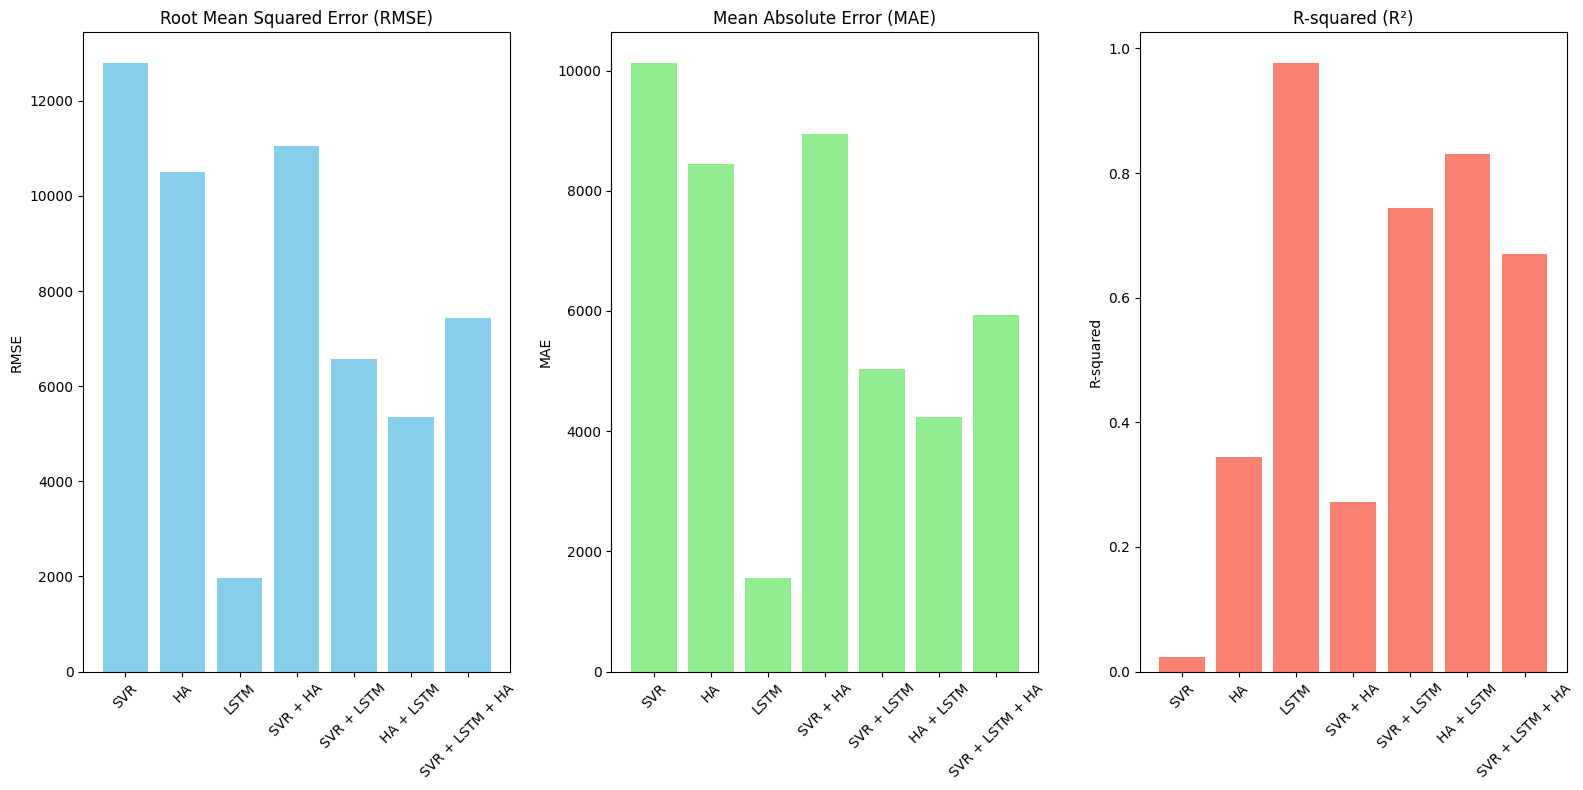

In [20]:
import matplotlib.pyplot as plt

def calculate_metrics(true_values, predictions):
    """
    Calculates RMSE, MAE, and R-squared metrics.

    Parameters:
    - true_values: array-like, actual observed values
    - predictions: array-like, model's predicted values

    Returns:
    - A dictionary containing RMSE, MAE, and R-squared values
    """
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(true_values, predictions))

    # Calculate MAE
    mae = mean_absolute_error(true_values, predictions)

    # Calculate R-squared
    r_squared = r2_score(true_values, predictions)

    return {"RMSE": rmse, "MAE": mae, "R-squared": r_squared}

# Define true values and predictions for each model/ensemble
true_values = y_test  # Ground truth values from the test set

# Calculating MAE, MSE, R2 for each model/ensemble
results = {
    "SVR": calculate_metrics(true_values, y_pred_svr),
    "HA": calculate_metrics(true_values, y_pred_ha),
    "LSTM": calculate_metrics(true_values, y_pred_lstm_tuned),
    "SVR + HA": calculate_metrics(true_values, y_pred_svr_ha),
    "SVR + LSTM": calculate_metrics(true_values, y_pred_svr_lstm),
    "HA + LSTM": calculate_metrics(true_values, y_pred_ha_lstm),
    "SVR + LSTM + HA": calculate_metrics(true_values, y_pred_svr_lstm_ha),
}

# Organize results in a format suitable for plotting
model_names = list(results.keys())
rmse_values = [metrics['RMSE'] for metrics in results.values()]
mae_values = [metrics['MAE'] for metrics in results.values()]
r2_values = [metrics['R-squared'] for metrics in results.values()]

# Set up the figure and subplots
plt.figure(figsize=(16, 8))

# Plot RMSE
plt.subplot(1, 3, 1)
plt.bar(model_names, rmse_values, color='skyblue')
plt.ylabel("RMSE")
plt.title("Root Mean Squared Error (RMSE)")
plt.xticks(rotation=45)

# Plot MAE
plt.subplot(1, 3, 2)
plt.bar(model_names, mae_values, color='lightgreen')
plt.ylabel("MAE")
plt.title("Mean Absolute Error (MAE)")
plt.xticks(rotation=45)

# Plot R-squared
plt.subplot(1, 3, 3)
plt.bar(model_names, r2_values, color='salmon')
plt.ylabel("R-squared")
plt.title("R-squared (R²)")
plt.xticks(rotation=45)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

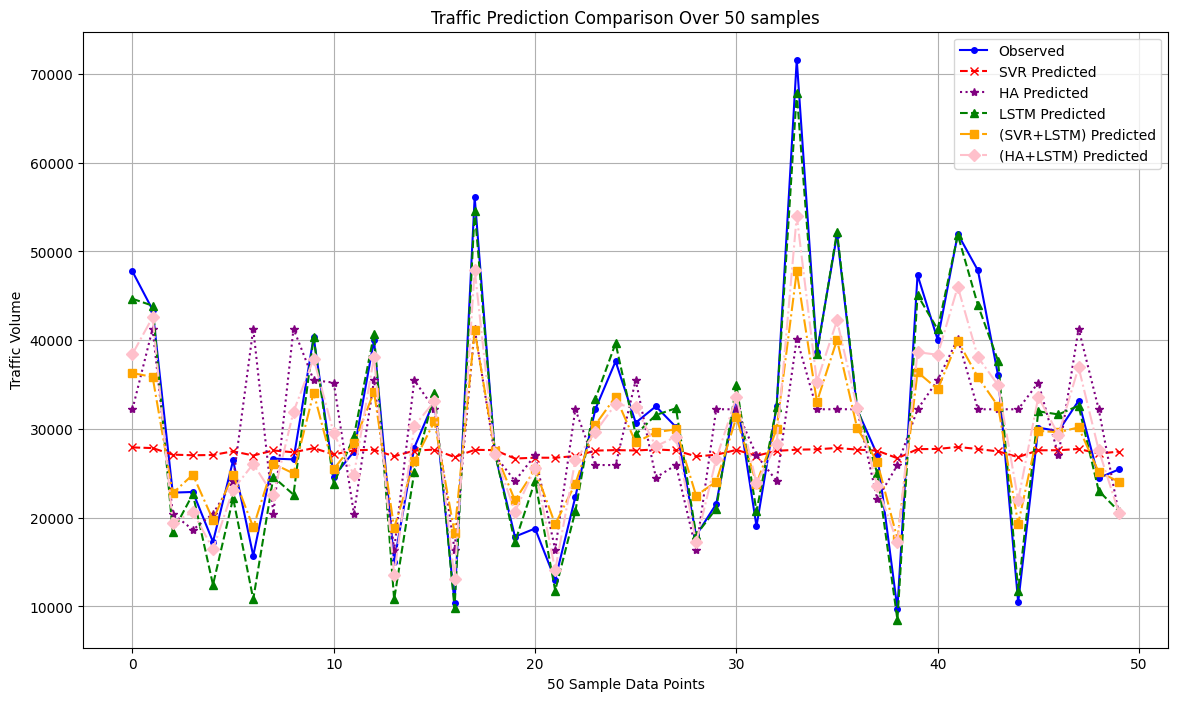

In [21]:
# Define the time range for visualization (e.g., first 50 test samples)
time_range = 50
time_axis = range(time_range)

# Prepare observed values and predictions for the plot
observed_values = y_test[:time_range]
svr_predictions = y_pred_svr[:time_range]
ha_predictions = y_pred_ha[:time_range]
lstm_predictions = y_pred_lstm_tuned[:time_range]
svr_lstm_predictions = y_pred_svr_lstm[:time_range]  # SVR + LSTM combination
ha_lstm_predictions = y_pred_ha_lstm[:time_range] # HA + LSTM combination

# Plotting observed values and predictions
plt.figure(figsize=(14, 8))
plt.plot(time_axis, observed_values, label='Observed', color='blue', marker='o', markersize=4, linestyle='-')
plt.plot(time_axis, svr_predictions, label='SVR Predicted', color='red', marker='x', linestyle='--')
plt.plot(time_axis, ha_predictions, label='HA Predicted', color='purple', marker='*', linestyle=':')
plt.plot(time_axis, lstm_predictions, label='LSTM Predicted', color='green', marker='^', linestyle='--')
plt.plot(time_axis, svr_lstm_predictions, label='(SVR+LSTM) Predicted', color='orange', marker='s', linestyle='-.')
plt.plot(time_axis, ha_lstm_predictions, label='(HA+LSTM) Predicted', color='pink', marker='D', linestyle='-.')

plt.xlabel("50 Sample Data Points")
plt.ylabel("Traffic Volume")
plt.title("Traffic Prediction Comparison Over 50 samples")
plt.legend()
plt.grid(True)
plt.show()

## **Aesthetics**

In [22]:
# Find unique combinations of 'Area Name' and 'Road/Intersection Name'
unique_combinations = traffic_data_copy[['Area Name', 'Road/Intersection Name']].drop_duplicates()

# Convert 'Area Name' and 'Road/Intersection Name' to strings for accurate concatenation
unique_combinations['Area Name'] = unique_combinations['Area Name'].astype(str)
unique_combinations['Road/Intersection Name'] = unique_combinations['Road/Intersection Name'].astype(str)

# Create the comma-separated string list
location_list = unique_combinations.apply(lambda row: row['Area Name'] + ', ' + row['Road/Intersection Name'], axis=1).tolist()

location_list

['Indiranagar, 100 Feet Road',
 'Indiranagar, CMH Road',
 'Whitefield, Marathahalli Bridge',
 'Koramangala, Sony World Junction',
 'Koramangala, Sarjapur Road',
 'M.G. Road, Trinity Circle',
 'M.G. Road, Anil Kumble Circle',
 'Jayanagar, Jayanagar 4th Block',
 'Jayanagar, South End Circle',
 'Hebbal, Hebbal Flyover',
 'Hebbal, Ballari Road',
 'Yeshwanthpur, Yeshwanthpur Circle',
 'Yeshwanthpur, Tumkur Road',
 'Whitefield, ITPL Main Road',
 'Electronic City, Silk Board Junction',
 'Electronic City, Hosur Road']

In [23]:
# Group by 'Area Name' and 'Road/Intersection Name' and calculate the average of the specified columns
average_by_location = traffic_data_copy.groupby(['Area Name', 'Road/Intersection Name'])[['Traffic Volume', 'Average Speed', 'Travel Time Index', 'Congestion Level', 'Road Capacity Utilization', 'Incident Reports', 'Environmental Impact', 'Public Transport Usage', 'Traffic Signal Compliance', 'Parking Usage', 'Pedestrian and Cyclist Count']].mean()

average_by_location

Traffic Volume  Average Speed  \
Area Name       Road/Intersection Name                                  
Electronic City Hosur Road                16557.223827      43.991574   
                Silk Board Junction       16134.534545      43.329606   
Hebbal          Ballari Road              26272.640756      39.956644   
                Hebbal Flyover            26794.924051      40.343881   
Indiranagar     100 Feet Road             31956.852326      38.428621   
                CMH Road                  32611.924419      38.860062   
Jayanagar       Jayanagar 4th Block       24496.236207      40.148526   
                South End Circle          24704.119730      39.438724   
Koramangala     Sarjapur Road             40189.950000      36.145719   
                Sony World Junction       41470.801170      35.980025   
M.G. Road       Anil Kumble Circle        35251.828722      37.395406   
                Trinity Circle            35350.137466      37.678174   
Whitefield      ITPL Main Road            21866.037778      41.972256   
                Marathahalli Bridge       20772.953252      42.295083   
Yeshwanthpur    Tumkur Road               18574.490305      43.945861   
                Yeshwanthpur Circle       19277.115282      42.965323   

                                        Travel Time Index  Congestion Level  \
Area Name       Road/Intersection Name                                        
Electronic City Hosur Road                       1.225944         55.203745   
                Silk Board Junction              1.227157         53.699820   
Hebbal          Ballari Road                     1.362689         79.514551   
                Hebbal Flyover                   1.372682         80.662354   
Indiranagar     100 Feet Road                    1.396118         87.107415   
                CMH Road                         1.408480         88.176365   
Jayanagar       Jayanagar 4th Block              1.354944         76.712995   
                South End Circle                 1.358507         77.277398   
Koramangala     Sarjapur Road                    1.468047         93.845163   
                Sony World Junction              1.469595         94.125087   
M.G. Road       Anil Kumble Circle               1.444290         90.782145   
                Trinity Circle                   1.436865         90.372556   
Whitefield      ITPL Main Road                   1.300633         71.101106   
                Marathahalli Bridge              1.287083         67.182913   
Yeshwanthpur    Tumkur Road                      1.255256         60.949415   
                Yeshwanthpur Circle              1.272554         63.744162   

                                        Road Capacity Utilization  \
Area Name       Road/Intersection Name                              
Electronic City Hosur Road                              77.583447   
                Silk Board Junction                     74.923904   
Hebbal          Ballari Road                            92.630587   
                Hebbal Flyover                          92.813665   
Indiranagar     100 Feet Road                           95.669339   
                CMH Road                                95.848204   
Jayanagar       Jayanagar 4th Block                     91.533435   
                South End Circle                        91.504732   
Koramangala     Sarjapur Road                           97.391909   
                Sony World Junction                     97.462395   
M.G. Road       Anil Kumble Circle                      96.609093   
                Trinity Circle                          96.498600   
Whitefield      ITPL Main Road                          88.340567   
                Marathahalli Bridge                     85.539280   
Yeshwanthpur    Tumkur Road                             82.180902   
                Yeshwanthpur Circle                     82.602769   

                                        Incident Reports  \

In [24]:
def prepare_input_data(start_area_name, start_road_intersection_name, end_area_name, end_road_intersection_name, weekday, weather, roadwork):

    print("in prepare input")
    print(start_area_name)
    print(start_road_intersection_name)
    print(end_area_name)
    print(end_road_intersection_name)

    #Get the average data based on location
    start_location_data = average_by_location.loc[(start_area_name, start_road_intersection_name)]
    end_location_data = average_by_location.loc[(end_area_name, end_road_intersection_name)]

    start_location_input = pd.DataFrame({
        'Area Name': [start_area_name],
        'Road/Intersection Name': [start_road_intersection_name],
        'Average Speed': [start_location_data['Average Speed']],
        'Travel Time Index': [start_location_data['Travel Time Index']],
        'Congestion Level': [start_location_data['Congestion Level']],
        'Road Capacity Utilization': [start_location_data['Road Capacity Utilization']],
        'Incident Reports': [start_location_data['Incident Reports']],
        'Environmental Impact': [start_location_data['Environmental Impact']],
        'Public Transport Usage': [start_location_data['Public Transport Usage']],
        'Traffic Signal Compliance': [start_location_data['Traffic Signal Compliance']],
        'Parking Usage': [start_location_data['Parking Usage']],
        'Pedestrian and Cyclist Count': [start_location_data['Pedestrian and Cyclist Count']],
        'Weather Conditions': [weather],
        'Roadwork and Construction Activity': [roadwork],
        'Weekday': [weekday]
    })

    end_location_input = pd.DataFrame({
        'Area Name': [end_area_name],
        'Road/Intersection Name': [end_road_intersection_name],
        'Average Speed': [end_location_data['Average Speed']],
        'Travel Time Index': [end_location_data['Travel Time Index']],
        'Congestion Level': [end_location_data['Congestion Level']],
        'Road Capacity Utilization': [end_location_data['Road Capacity Utilization']],
        'Incident Reports': [end_location_data['Incident Reports']],
        'Environmental Impact': [end_location_data['Environmental Impact']],
        'Public Transport Usage': [end_location_data['Public Transport Usage']],
        'Traffic Signal Compliance': [end_location_data['Traffic Signal Compliance']],
        'Parking Usage': [end_location_data['Parking Usage']],
        'Pedestrian and Cyclist Count': [end_location_data['Pedestrian and Cyclist Count']],
        'Weather Conditions': [weather],
        'Roadwork and Construction Activity': [roadwork],
        'Weekday': [weekday]
    })

    # Apply Label Encoding to each categorical column
    for column in categorical_columns:
        start_location_input[column] = label_encoders[column].transform(start_location_input[column])
        end_location_input[column] = label_encoders[column].transform(end_location_input[column])

    # Scaling the features
    start_location_input_scaled = scaler.transform(start_location_input)
    end_location_input_scaled = scaler.transform(end_location_input)

    # Reshaping data for LSTM (samples, timesteps, features)
    start_input_lstm = start_location_input_scaled.reshape((start_location_input_scaled.shape[0], 1, start_location_input_scaled.shape[1]))
    end_input_lstm = end_location_input_scaled.reshape((end_location_input_scaled.shape[0], 1, end_location_input_scaled.shape[1]))

    return start_input_lstm, end_input_lstm

In [25]:
import requests
import folium
from geopy.geocoders import Nominatim
!pip install polyline
import polyline

# Initialize geolocator
geolocator = Nominatim(user_agent="trafficPredictor")

In [26]:
# Function to get coordinates
def get_coordinates(location_name):
    location = geolocator.geocode(location_name)
    if location:
        return [location.latitude, location.longitude]
    else:
        raise ValueError(f"Location '{location_name}' not found")

In [27]:
# Function to display route on map using OpenRouteService API and Folium
def display_route_on_map(start_location, end_location, route_color):
    # OpenRouteService API key
    api_key = "5b3ce3597851110001cf62488592fa03db2b4fd08779eeb8e4ef5676"

    # Get the coordinates for start and end locations
    start_location = start_location + ', Bangalore'
    end_location = end_location + ', Bangalore'
    start_coords = get_coordinates(start_location)
    end_coords = get_coordinates(end_location)

    # Select route profile based on type
    route_profile = "driving-car"
    url = (
        f"https://api.openrouteservice.org/v2/directions/{route_profile}"
    )

    # Request body for OpenRouteService API
    headers = {
        "Authorization": api_key,
        "Content-Type": "application/json"
    }
    body = {
        "coordinates": [[start_coords[1], start_coords[0]], [end_coords[1], end_coords[0]]],
        "instructions": False
    }

    # Get route data
    response = requests.post(url, json=body, headers=headers)
    route_data = response.json()

    # Extract route coordinates for visualization
    # Extract the encoded polyline
    encoded_geometry = route_data['routes'][0]['geometry']
    # Decode the polyline to get the coordinates as [[lat, lon], [lat, lon], ...]
    route_coords = polyline.decode(encoded_geometry)

    # Create map centered around start location
    m = folium.Map(location=start_coords, zoom_start=13)

    # Add start and end markers
    folium.Marker(start_coords, tooltip=start_location).add_to(m)
    folium.Marker(end_coords, tooltip=end_location).add_to(m)

    # Draw the route on the map
    folium.PolyLine(route_coords, color=route_color, weight=5, opacity=0.8).add_to(m)

    # Display the map
    return m

In [30]:
from tensorflow.keras.models import load_model
import ipywidgets as widgets
from IPython.display import display, clear_output

# Group by 'Area Name' and aggregate 'Road/Intersection Name' into lists
area_to_roads = traffic_data_copy.groupby('Area Name')['Road/Intersection Name'].apply(lambda x: list(set(x))).to_dict()

# Defining traffic volume threshold
traffic_volume_threshold = 20000

# Drop down lists
start_locations = list(area_to_roads.keys())
end_locations = list(area_to_roads.keys())
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"] # List of weekdays
weather_condition = ['Clear', 'Fog', 'Overcast', 'Rain', 'Windy'] # List of Weather condition
roadwork_options = ["No", "Yes"]

# Dropdown widgets
start_location_dropdown = widgets.Dropdown(
    options=start_locations,
    description='Start Location :'
)

# Dropdown for start roads based on selected area
start_road_dropdown = widgets.Dropdown(
    options=area_to_roads.get(start_location_dropdown.value, []),  # initially empty
    description='Nearby Road/Intersection for start : '
)

end_location_dropdown = widgets.Dropdown(
    options=end_locations,
    description='End Location :'
)

# Dropdown for end roads based on selected area
end_road_dropdown = widgets.Dropdown(
    options=area_to_roads.get(end_location_dropdown.value, []),  # initially empty
    description='Nearby Road/Intersection for destination : '
)

weekday_dropdown = widgets.Dropdown(
    options=weekdays,
    description='Weekday :'
)

weather_dropdown = widgets.Dropdown(
    options=weather_condition,
    description='Weather Condition :'
)

roadwork_dropdown = widgets.Dropdown(
    options=roadwork_options,
    description='Roadwork :'
)

# Output widget for displaying the map only
map_output = widgets.Output()

# Button widget
submit_button = widgets.Button(description="Submit")

# Function to update start road dropdown based on selected start location
def update_start_road_dropdown(*args):
    selected_area = start_location_dropdown.value
    start_road_dropdown.options = area_to_roads.get(selected_area, [])

# Function to update end road dropdown based on selected end location
def update_end_road_dropdown(*args):
    selected_area = end_location_dropdown.value
    end_road_dropdown.options = area_to_roads.get(selected_area, [])

# Attach update function to start and end location dropdowns
start_location_dropdown.observe(update_start_road_dropdown, 'value')
end_location_dropdown.observe(update_end_road_dropdown, 'value')

# Display selected values when button is clicked
def on_submit_button_clicked(b):
    with map_output:
        clear_output(wait=True)  # Clear only the map output, not other widgets

        # Get location values from dropdown widgets
        start_area_name = start_location_dropdown.value
        start_road_name = start_road_dropdown.value
        end_area_name = end_location_dropdown.value
        end_road_name = end_road_dropdown.value
        print(f'start_area_name: {start_location_dropdown.value}')
        print(f'end_area_name: {end_location_dropdown.value}')
        print(f'start_road_name: {start_road_dropdown.value}')
        print(f'end_road_name: {end_road_dropdown.value}')

        # Prepare the input to be given to the model
        start_location_input, end_location_input = prepare_input_data(start_area_name, start_road_name, end_area_name, end_road_name, weekday_dropdown.value, weather_dropdown.value, roadwork_dropdown.value)

        # Predict using the LSTM model
        start_prediction = lstm_model_tuned.predict(start_location_input)
        end_prediction = lstm_model_tuned.predict(end_location_input)

        print(f'Start prediction:{start_prediction}')
        print(f'End Prediction: {end_prediction}')

        # start_average_traffic_volume = average_by_location.loc[(start_area_name, start_road_intersection_name)]['Traffic Volume']
        # end_average_traffic_volume = average_by_location.loc[(end_area_name, end_road_intersection_name)]['Traffic Volume']

        # print(f'Start Average Traffic : {start_average_traffic_volume}')
        # print(f'End Average Traffic : {end_average_traffic_volume}')

        color = 'Orange'
        if(start_prediction < traffic_volume_threshold and end_prediction < traffic_volume_threshold):
            color = 'Green'
        elif(start_prediction > traffic_volume_threshold and end_prediction > traffic_volume_threshold):
            color = 'Red'

        map = display_route_on_map(start_area_name, end_area_name, color)

        display(map)
# Set button click event
submit_button.on_click(on_submit_button_clicked)

# Display widgets
display(start_location_dropdown, start_road_dropdown, end_location_dropdown, end_road_dropdown, weekday_dropdown, weather_dropdown, roadwork_dropdown, submit_button, map_output)


Dropdown(description='Start Location :', options=('Electronic City', 'Hebbal', 'Indiranagar', 'Jayanagar', 'Ko…

Dropdown(description='Nearby Road/Intersection for start : ', options=('Silk Board Junction', 'Hosur Road'), v…

Dropdown(description='End Location :', options=('Electronic City', 'Hebbal', 'Indiranagar', 'Jayanagar', 'Kora…

Dropdown(description='Nearby Road/Intersection for destination : ', options=('Silk Board Junction', 'Hosur Roa…

Dropdown(description='Weekday :', options=('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',…

Dropdown(description='Weather Condition :', options=('Clear', 'Fog', 'Overcast', 'Rain', 'Windy'), value='Clea…

Dropdown(description='Roadwork :', options=('No', 'Yes'), value='No')

Button(description='Submit', style=ButtonStyle())

Output()